Combine the 1m gnd and veg DEMS
* 1m ground DEM is made from only ground and water values and has linear interpolation so their is a valaue everywhere
* 1m vegetation DEM is made ground ground, vegetation, unclassifgied and overlap values and has no interpolation so their are gaps where there is no data
* Use the vegetation DEM where it exists and use the ground DEM to fill in any gaps.

In [6]:
import rioxarray
import rioxarray.merge
import pathlib

In [9]:
base_path = pathlib.Path("C:/Users/pearsonra/Documents/data/dem_for_sanjay")
gnd_path = base_path / "caches/gnd/1m_gnd.nc"
veg_path = base_path / "caches/veg/1m_veg.nc"
dem_path = base_path / "1m_combined.nc"

In [5]:
with rioxarray.rioxarray.open_rasterio(gnd_path, masked=True) as gnd_dem:
    gnd_dem.load()
gnd_dem = gnd_dem.copy(deep=True)  # Deep copy is required to ensure the opened file is properly unlocked
with rioxarray.rioxarray.open_rasterio(veg_path, masked=True) as veg_dem:
    veg_dem.load()
veg_dem = veg_dem.copy(deep=True)  # Deep copy is required to ensure the opened file is properly unlocked

In [7]:
dem = rioxarray.merge.merge_arrays([veg_dem, gnd_dem], method='first')

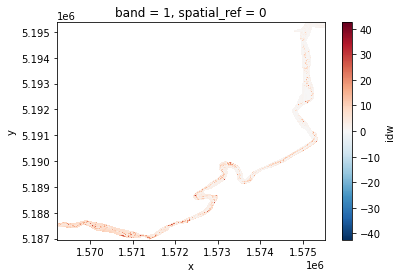

In [8]:
dem.plot()

In [10]:
dem.to_netcdf(dem_path)